In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import csv
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


Using TensorFlow backend.


Machine d'Amrta

In [ ]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine de Dylane

In [2]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [3]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [4]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [5]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x_prediction

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1417,2588,3818,0,0,2,2,1.111111,1.407407,0.259259,0.555556,1.777778,1.629630,0.962963,0.925926
1416,3100,7928,0,7,1,0,0.777778,2.657143,0.407407,1.142857,1.085714,1.514286,0.485714,0.742857
1415,7165,2242,2,0,0,1,1.617647,0.740741,0.705882,0.333333,1.518519,1.666667,0.666667,0.740741
691,2817,2956,0,0,1,1,0.903226,1.225806,0.419355,0.548387,1.483871,1.741935,0.612903,0.741935
1414,4490,6735,1,3,0,0,1.185185,1.962963,0.444444,0.888889,1.296296,1.333333,0.407407,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,6562,5314,1,0,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,3593,1589,0,0,4,1,0.800000,0.833333,0.333333,0.566667,1.333333,1.666667,0.533333,0.700000
2026,3175,3593,0,2,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,1067,1159,0,0,1,3,0.800000,0.766667,0.400000,0.466667,1.333333,1.966667,0.600000,0.766667


### Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [4]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','homeTeam','awayTeam','id_match','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,homeTeam,awayTeam,id_match,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1082,2020-06-30,FINISHED,FC Barcelona,Club Atlético de Madrid,273885,81,78,13105,9329,2.102564,1.325000,0.950000,0.750000
1980,2020-06-30,FINISHED,Vitória SC,Vitória FC,274432,5543,5620,3593,3593,1.642857,0.785714,1.142857,1.250000
1982,2020-07-01,FINISHED,Os Belenenses Futebol,CD Tondela,274433,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
1983,2020-07-01,FINISHED,Sporting Clube de Portugal,Gil Vicente FC,274431,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1083,2020-07-01,FINISHED,Valencia CF,Athletic Club,273886,95,77,9770,9286,1.350000,1.125000,1.906250,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,274477,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,274478,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,274479,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,274480,5601,5544,1067,1159,0.800000,0.774194,1.290323,1.903226


In [5]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
print(x_train.shape,y_train.shape)


(9220, 6) (9220,)


In [6]:
classes=np.unique(y_train)
nbClasses=len(classes)
epochs=200

nbClasses


3

In [7]:
x_train.shape[1]

6

In [8]:
def create_model():
    
    model = Sequential()
    
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
    model.add(BatchNormalization())
    model.add(Dropout(0.05))
    
    model.add(Dense(3, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [9]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3

## Modèle  avec le dataset de 6 variables

In [10]:
save = ModelCheckpoint('model_Final_winner_V3.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result2 = model.fit(x_train, y_train,epochs=40,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 9220 samples, validate on 2305 samples
Epoch 1/40

Epoch 00001: val_accuracy improved from -inf to 0.53579, saving model to model_Final_winner_V3.h5
9220/9220 - 4s - loss: 1.0468 - accuracy: 0.4910 - val_loss: 1.0279 - val_accuracy: 0.5358
Epoch 2/40

Epoch 00002: val_accuracy did not improve from 0.53579
9220/9220 - 2s - loss: 1.0163 - accuracy: 0.5073 - val_loss: 1.0621 - val_accuracy: 0.4590
Epoch 3/40

Epoch 00003: val_accuracy improved from 0.53579 to 0.55748, saving model to model_Final_winner_V3.h5
9220/9220 - 2s - loss: 1.0116 - accuracy: 0.5099 - val_loss: 0.9773 - val_accuracy: 0.5575
Epoch 4/40

Epoch 00004: val_accuracy did not improve from 0.55748
9220/9220 - 2s - loss: 1.0039 - accuracy: 0.5153 - val_loss: 0.9514 - val_accuracy: 0.5570
Epoch 5/40

Epoch 00005: val_accuracy did not improve from 0.55748
9220/9220 - 2s - loss: 1.0041 - accuracy: 0.5088 - val_loss: 0.9656 - val_accuracy: 0.5523
Epoch 6/40

Epoch 00006: val_accuracy did not improve from 0.55748
9220/9

### Graphique 

Text(0, 0.5, 'Accuracy')

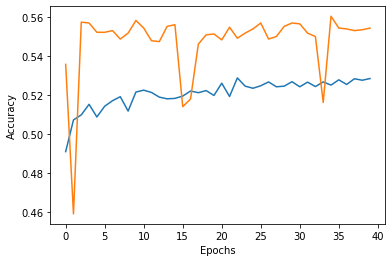

In [11]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Modèle  avec le dataset complet

In [11]:
save = ModelCheckpoint('model_Final_winner2.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result = model.fit(x_train, y_train,epochs=100,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 9215 samples, validate on 2304 samples
Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.51780, saving model to model_Final_winner2.h5
9215/9215 - 4s - loss: 6.0147 - accuracy: 0.4582 - val_loss: 1.1941 - val_accuracy: 0.5178
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.51780
9215/9215 - 2s - loss: 1.0928 - accuracy: 0.4915 - val_loss: 1.0226 - val_accuracy: 0.4740
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.51780 to 0.51823, saving model to model_Final_winner2.h5
9215/9215 - 2s - loss: 1.0279 - accuracy: 0.5101 - val_loss: 1.0488 - val_accuracy: 0.5182
Epoch 4/100

Epoch 00004: val_accuracy improved from 0.51823 to 0.52170, saving model to model_Final_winner2.h5
9215/9215 - 2s - loss: 1.0180 - accuracy: 0.5111 - val_loss: 1.0160 - val_accuracy: 0.5217
Epoch 5/100

Epoch 00005: val_accuracy improved from 0.52170 to 0.52517, saving model to model_Final_winner2.h5
9215/9215 - 2s - loss: 0.9998 - accuracy: 0.5214 - val_loss: 0.9821 - val_a


Epoch 00050: val_accuracy did not improve from 0.53472
9215/9215 - 2s - loss: 0.9836 - accuracy: 0.5351 - val_loss: 0.9849 - val_accuracy: 0.5208
Epoch 51/100

Epoch 00051: val_accuracy did not improve from 0.53472
9215/9215 - 2s - loss: 0.9777 - accuracy: 0.5346 - val_loss: 0.9819 - val_accuracy: 0.5295
Epoch 52/100

Epoch 00052: val_accuracy did not improve from 0.53472
9215/9215 - 2s - loss: 0.9803 - accuracy: 0.5348 - val_loss: 0.9790 - val_accuracy: 0.5273
Epoch 53/100

Epoch 00053: val_accuracy did not improve from 0.53472
9215/9215 - 3s - loss: 0.9768 - accuracy: 0.5363 - val_loss: 0.9779 - val_accuracy: 0.5226
Epoch 54/100

Epoch 00054: val_accuracy did not improve from 0.53472
9215/9215 - 3s - loss: 0.9742 - accuracy: 0.5376 - val_loss: 0.9912 - val_accuracy: 0.5239
Epoch 55/100

Epoch 00055: val_accuracy did not improve from 0.53472
9215/9215 - 3s - loss: 0.9744 - accuracy: 0.5377 - val_loss: 0.9862 - val_accuracy: 0.5195
Epoch 56/100

Epoch 00056: val_accuracy did not impro

Text(0, 0.5, 'Accuracy')

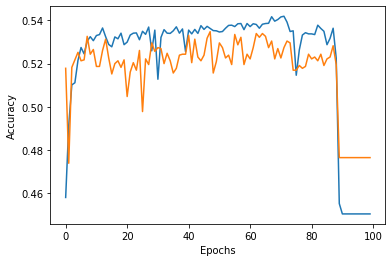

In [12]:
plt.plot(result.history['accuracy'],label='Accuracy')#bleu
plt.plot(result.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Prédictions

In [39]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0

In [40]:
unique[1]

array(['2020-06-30', 'FINISHED', 'Vitória SC', 'Vitória FC', 274432, 5543,
       5620, 3593, 3593, 1.6428571428571428, 0.7857142857142857,
       1.1428571428571428, 1.25], dtype=object)

In [21]:
model.load_weights("model_Final_winner_V3.h5")

In [41]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    egalite = round(predictions_final[0][0]*100,2)
    victoire = round(predictions_final[0][1]*100,2)
    perte = round(predictions_final[0][2]*100,2)
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

In [42]:
df4 = {'date':x_prediction.date,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,
       'id_AwayTeam':x_prediction.idAwayTeam,'id_match':x_prediction.id_match,
       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df4 = pd.DataFrame(df4)
df4

,date,status,id_HomeTeam,id_AwayTeam,id_match,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1082,2020-06-30,FINISHED,81,78,273885,FC Barcelona,Club Atlético de Madrid,15.35,76.48,8.17,1
1980,2020-06-30,FINISHED,5543,5620,274432,Vitória SC,Vitória FC,30.95,42.90,26.15,1
1982,2020-07-01,FINISHED,5568,1049,274433,Os Belenenses Futebol,CD Tondela,32.86,39.21,27.93,1
1983,2020-07-01,FINISHED,498,5533,274431,Sporting Clube de Portugal,Gil Vicente FC,14.81,76.72,8.48,1
1083,2020-07-01,FINISHED,95,77,273886,Valencia CF,Athletic Club,25.88,50.55,23.57,1
...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,1903,498,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,23.31,57.87,18.82,1
2025,2020-07-26,SCHEDULED,5620,5568,274478,Vitória FC,Os Belenenses Futebol,21.09,63.65,15.26,1
2026,2020-07-26,SCHEDULED,5530,5543,274479,CD Santa Clara,Vitória SC,31.19,40.93,27.88,1
2027,2020-07-26,SCHEDULED,5601,5544,274480,Portimonense SC,CD Aves,33.25,38.53,28.22,1


In [43]:
finished = []
scheduled = []

for i in df4.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [44]:
column_names = ["date", "status", "idHomeTeam","idAwayTeam","id_match","homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [45]:
df_fini=df_fini.sort_values(by = 'date',ascending=False)
df_programme=df_programme.sort_values(by = 'date',ascending=False)

In [46]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')